### Домашнее задание 1
Вариант 2

Присылайте ссылку на репозиторий на github с получившимся корпусом (ссылкой на получившийся корпус) и с тетрадкой .ipynb с кодом и с комментариями

1.  \[2 балла\] 
Выберите экспрессив и покажите, что это действительно экспрессив. Какой профиль Вы можете предположить для приведенного экспрессива -- U-образный, J-образный, перевернутое U или что-то другое? Какие примеры подкрепляют Ваше предположение?

2.  \[2 балла\]
Создайте корпус с контекстами, содержащими Ваш экспрессив, и с разметкой, например, от 1 до 5 звездочек. Разметка по экспрессивности может быть и другой, но хорошо иметь не меньше трёх уровней разметки. Ваш корпус может быть подкорпусом существующего датасета. 

3.  \[2 балла\]
Создайте профиль экспрессива по формуле из работы [Constant et al. 2009](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwitxty0p5_zAhVLx4sKHcomDaQQFnoECAQQAQ&url=https%3A%2F%2Fweb.stanford.edu%2F~cgpotts%2Fpapers%2Fconstant-davis-potts-schwarz-expressives.pdf&usg=AOvVaw3QUEeV5U8r1FKhWne43xn3). 

4.  \[1 балл\]
Подберите для данных регрессионную модель. Прокомментируйте.

5.  \[3 балла\]
Какой профиль получился -- U-образный, J-образный, перевернутое U или что-то другое? Проиллюстрируйте распределение примерами. Подтвердилась ли изначальная гипотеза? Есть ли среди корпусных данных неожиданные и интересные случаи?



### MAKE DATASET

In [ ]:
import pandas as pd
data = pd.read_json('/content/drive/MyDrive/ВШЭ мага/func.models/reviews_Video_Games_5.json.gz', lines=True)

In [ ]:
data = data[['reviewText', 'summary', 'overall']]
data.head()

,reviewText,summary,overall
0,Installing the game was a struggle (because of...,Pay to unlock content? I don't think so.,1
1,If you like rally cars get this game you will ...,Good rally game,4
2,1st shipment received a book instead of the ga...,Wrong key,1
3,"I got this version instead of the PS3 version,...","awesome game, if it did not crash frequently !!",3
4,I had Dirt 2 on Xbox 360 and it was an okay ga...,DIRT 3,4


In [ ]:
text = [str(x+' '+y) for x,y in zip(data.summary, data.reviewText	)]
text[0]

'Pay to unlock content? I don\'t think so. Installing the game was a struggle (because of games for windows live bugs).Some championship races and cars can only be "unlocked" by buying them as an addon to the game. I paid nearly 30 dollars when the game was new. I don\'t like the idea that I have to keep paying to keep playing.I noticed no improvement in the physics or graphics compared to Dirt 2.I tossed it in the garbage and vowed never to buy another codemasters game. I\'m really tired of arcade style rally/racing games anyway.I\'ll continue to get my fix from Richard Burns Rally, and you should to. :)http://www.amazon.com/Richard-Burns-Rally-PC/dp/B000C97156/ref=sr_1_1?ie=UTF8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallyThank you for reading my review! If you enjoyed it, be sure to rate it as helpful.'

In [ ]:
!pip install pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

!pip install nltk
from string import punctuation
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

In [ ]:
def remove_punctuation_and_make_lowercase(text):
    sentences = [(sentence.translate(str.maketrans('', '', punctuation))).lower() for sentence in text.split()]
    return ' '.join(sentences)


def lemmatization(text):
  tokens = word_tokenize(text)
  list_tokens = []
  for token in tokens:
    p = morph.parse(str(token))[0]
    list_tokens.append(p.normal_form)

  return ' '.join(list_tokens)

In [ ]:
lemmatization(remove_punctuation_and_make_lowercase(text[0]))

'pay to unlock content i dont think so installing the game was a struggle because of games for windows live bugssome championship races and cars can only be unlocked by buying them as an addon to the game i paid nearly 30 dollars when the game was new i dont like the idea that i have to keep paying to keep playingi noticed no improvement in the physics or graphics compared to dirt 2i tossed it in the garbage and vowed never to buy another codemasters game im really tired of arcade style rallyracing games anywayill continue to get my fix from richard burns rally and you should to httpwwwamazoncomrichardburnsrallypcdpb000c97156refsr11ieutf8qid1341886844sr81keywordsrichardburnsrallythank you for reading my review if you enjoyed it be sure to rate it as helpful'

In [ ]:
from tqdm.auto import tqdm
lemmatized_texts = [lemmatization(remove_punctuation_and_make_lowercase(txt)) for txt in tqdm(text)]
df = pd.DataFrame({'text': lemmatized_texts, 'score': data.overall})
df.head()

  0%|          | 0/231780 [00:00<?, ?it/s]

,text,score
0,pay to unlock content i dont think so installi...,1
1,good rally game if you like rally cars get thi...,4
2,wrong key 1st shipment received a book instead...,1
3,awesome game if it did not crash frequently i ...,3
4,dirt 3 i had dirt 2 on xbox 360 and it was an ...,4


In [ ]:
df.to_csv('/content/drive/MyDrive/ВШЭ мага/func.models/reviews_Video_Games_5.csv', index=False)

### ANALYSIS OF DATA

In [2]:
import pandas as pd

# полный датасет с отзывами после лемматизации
df = pd.read_csv('/content/drive/MyDrive/ВШЭ мага/func.models/reviews_Video_Games_5.csv')
df.head()

,text,score
0,pay to unlock content i dont think so installi...,1
1,good rally game if you like rally cars get thi...,4
2,wrong key 1st shipment received a book instead...,1
3,awesome game if it did not crash frequently i ...,3
4,dirt 3 i had dirt 2 on xbox 360 and it was an ...,4


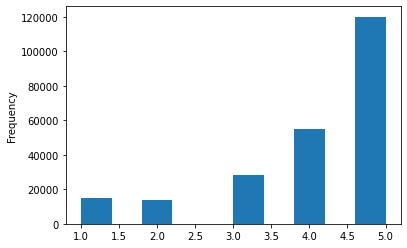

In [4]:
df['score'].plot.hist()

По графику видно, что оценка видео напрямую коррелирует с частотностью отзывов. Чем выше оценка - тем больше отзывов. На отличнуюоценку 5 приходится половина всех отзывов и четверть на хорошую 4.


In [27]:
# сформируем подкорпус с выбранным экспрессивом
target_word = 'awesome'

subcorpora = df[df.text.str.contains(target_word, regex= True, na=False)]
subcorpora

,text,score
3,awesome game if it did not crash frequently i ...,3
10,best in the series im not quite finished with ...,5
33,tremendous game i played the original zelda as...,5
39,awesome game my oldest grandson loves this gam...,5
59,nice but its looks awesome but the down side i...,3
...,...,...
231751,i really enjoy this console i love this consol...,5
231752,finally got one had this since released withou...,5
231757,call me what you will this is a long time comi...,4
231762,a great gaming and entertainment center overal...,4


In [49]:
subcorpora.to_csv('subcorpora.csv', index=False)

In [12]:
round((100*len(subcorpora))/len(df),1)
# подкорпус, содержащий нужный экспрессив - это всего лишь 10% от всего корпуса

10.2

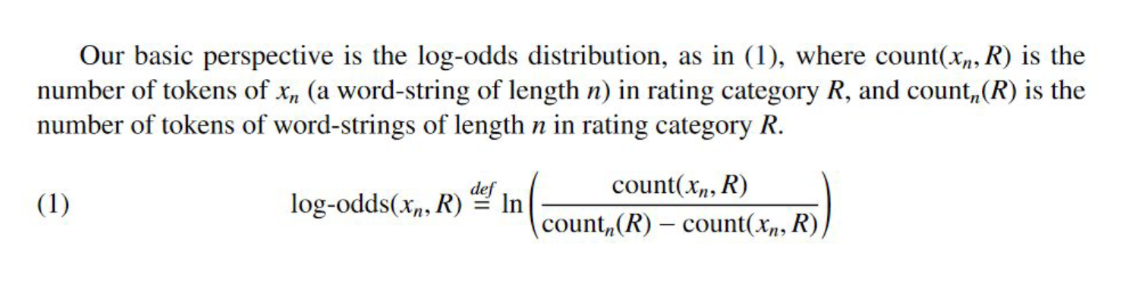

In [30]:
import collections
counter = collections.Counter()

for text in subcorpora.text:
  for word in text.split(' '):
    counter[word] += 1

In [32]:
print(counter[target_word],'раз слово awesome используется в подкорпусе')

27609 раз слово awesome используется в подкорпусе


In [47]:
import math

def log_odds(df, target_word: str, counter, category: int):

  counter = collections.Counter()

  # выбираем только отзывы с нужной оценкой
  df = df[df['score'] == category]
  for text in df.text:
    for word in text.split(' '):
      counter[word] += 1

  # Сколько раз нужный токен употреблялся в определенной категории
  num_tokens_target_word = counter[target_word]

  # Cколько раз токены, такой же длины, как и выбранный экспрессив, употреблялись в нужной категории
  num_tokens_rating_category = 0
  for text in df.text:
    for word in text.split(' '):
      if len(word) == len(target_word):
        num_tokens_rating_category += counter[word]

  log_odds = math.log(num_tokens_target_word/(num_tokens_rating_category - num_tokens_target_word))

  return log_odds

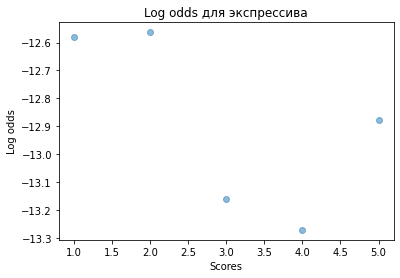

In [48]:
import matplotlib.pyplot as plt

Y = [log_odds(df, target_word, counter,  category=k) for k in [1,2,3,4,5]]
X = [1,2,3,4,5]

plt.scatter(X, Y, alpha=0.5)
plt.title('Log odds для экспрессива')
plt.xlabel('Scores')
plt.ylabel('Log odds')
plt.show()

#Получился профиль  J-reversed

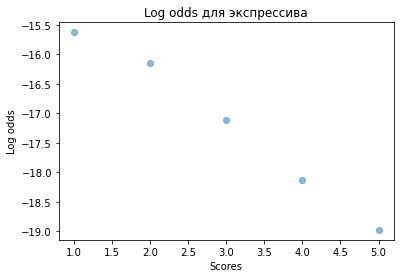

In [51]:
import matplotlib.pyplot as plt

target_word = 'bad'
Y = [log_odds(df, target_word, counter,  category=k) for k in [1,2,3,4,5]]
X = [1,2,3,4,5]

plt.scatter(X, Y, alpha=0.5)
plt.title('Log odds для экспрессива')
plt.xlabel('Scores')
plt.ylabel('Log odds')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

target_word = 'bad'
Y = [log_odds(df, target_word, counter,  category=k) for k in [1,2,3,4,5]]
X = [1,2,3,4,5]

plt.scatter(X, Y, alpha=0.5)
plt.title('Log odds для экспрессива')
plt.xlabel('Scores')
plt.ylabel('Log odds')
plt.show()